# Touches by Percentage per Third - English Premier League 2024/2025 (19/12/2024)

In [2]:
from mplsoccer import Pitch
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.cm as cm

The path to wherever your CSV file is located

In [3]:

file_path = '/Users/lukemercouris/Desktop/premtouches2425.csv'

df = pd.read_csv(file_path, skiprows=1)  # Skip the first row (column names row)
df.rename(columns={
    'Unnamed: 0': 'Team',
    'Touc': 'Def 3rd',
    'Touc.1': 'Mid 3rd',
    'Touc.2': 'Att 3rd'
}, inplace=True)

Percentages for each third

In [4]:
df['Total Touches'] = df[['Def 3rd', 'Mid 3rd', 'Att 3rd']].sum(axis=1)
df['Def 3rd %'] = (df['Def 3rd'] / df['Total Touches']) * 100
df['Mid 3rd %'] = (df['Mid 3rd'] / df['Total Touches']) * 100
df['Att 3rd %'] = (df['Att 3rd'] / df['Total Touches']) * 100

Get team names and percentages 

In [5]:
teams = df['Team'].values
touches_cols = ['Def 3rd %', 'Mid 3rd %', 'Att 3rd %']

1. Horizontal Pitch setup 
2. From observation - establish percentage range
3. Plot for each team -> Draw pitch, dotted lines to divide each third for clairty, get teams data, define x-coordinates for each third, and fill each third based on percentage

/var/folders/n7/m9hw31yn6mv33lt85pmlhzyc0000gn/T/ipykernel_53080/1698632059.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('coolwarm')


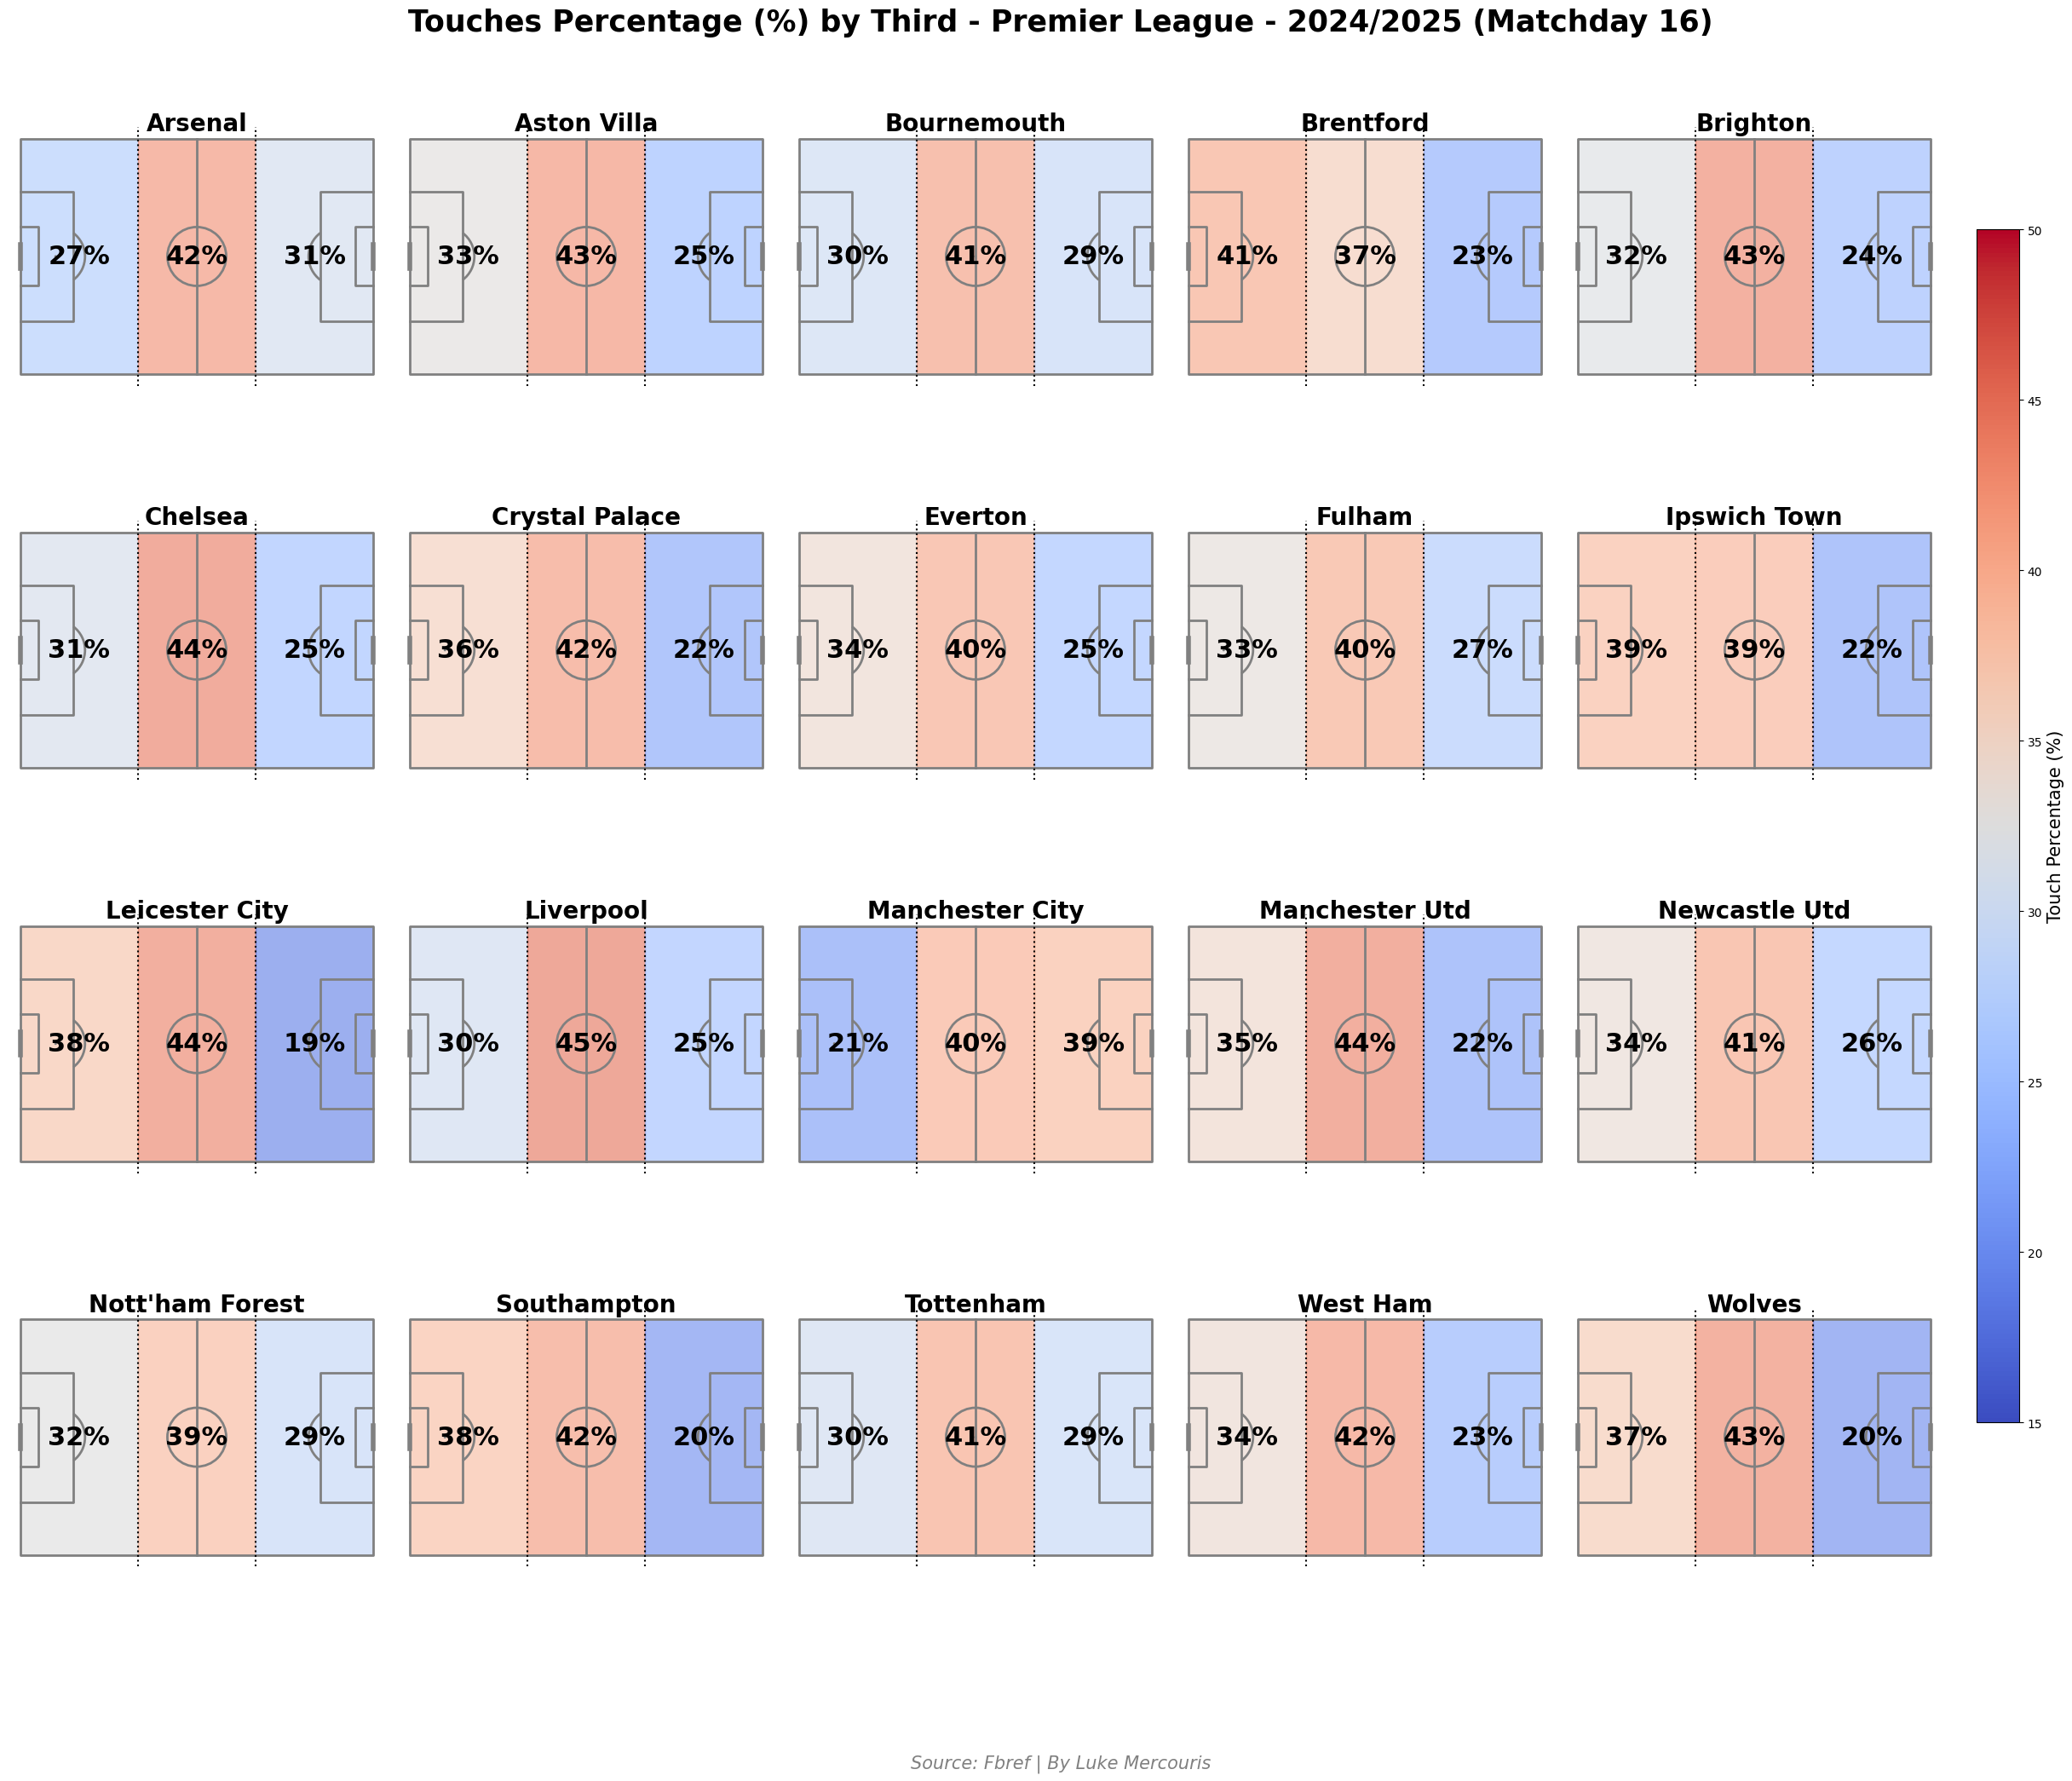

In [10]:

pitch = Pitch(pitch_type='statsbomb', line_zorder=2, pitch_color='white', line_color='grey')
fig, axs = plt.subplots(4, 5, figsize=(25, 20)) 
axs = axs.flatten()

norm = mcolors.Normalize(vmin=15, vmax=50)
cmap = cm.get_cmap('coolwarm')


for i, ax in enumerate(axs[:len(teams)]):
    
    pitch.draw(ax=ax)
    team_name = teams[i]
    ax.text(60, -5, team_name, ha='center', va='center', fontsize=20, fontweight='bold')

    
    ax.axvline(40, color='black', linestyle='dotted', lw=1.5)  
    ax.axvline(80, color='black', linestyle='dotted', lw=1.5) 

    
    team_data = df.loc[df['Team'] == team_name, touches_cols].values.flatten()

    
    thirds_x = [(0, 40), (40, 80), (80, 120)]  
    y_min, y_max = 0, 80  

    
    for (x_min, x_max), percentage in zip(thirds_x, team_data):
        
        clipped_percentage = max(15, min(50, percentage))
        color = cmap(norm(clipped_percentage))
        ax.add_patch(plt.Rectangle((x_min, y_min), x_max - x_min, y_max - y_min, color=color, alpha=0.6))

        
        ax.text((x_min + x_max) / 2, y_max / 2, f"{percentage:.0f}%", ha='center', va='center',
                fontsize=22, color='black', fontweight='bold')
        
# Remove unused axes
for ax in axs[len(teams):]:
    ax.remove()

# add the colour scale on the right axis
sm = cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar_ax = fig.add_axes([0.93, 0.15, 0.02, 0.7])  # put colour bar outside the grid
cbar = plt.colorbar(sm, cax=cbar_ax)
cbar.set_label('Touch Percentage (%)', fontsize=15)

# Add a title of your choice 
fig.suptitle("Touches Percentage (%) by Third - Premier League - 2024/2025 (Matchday 16)", fontsize=25, fontweight='bold')

# Add a tag with your custom text at the bottom of the plot - data source is imperative 
fig.text(0.5, -0.05, "Source: Fbref | By Luke Mercouris", 
         ha='center', va='center', fontsize=15, color='grey', fontstyle='italic')

# Adjust layout
plt.tight_layout(rect=[0, 0, 0.92, 1])  # Leave space for the color bar
plt.show()